## Phase 3.24
# Feature Selection, Ridge and Lasso

- <a href='#regularization'>Regularization</a>
    - <a href='#ridge_lasso'>Ridge & Lasso</a>
    - <a href='#modeling'>Modeling</a>
    - <a href='#generating_data'>Generating Data</a>

<a id='regularization'></a>
# Regularization
- In an attempt to fit a good model to data, we often tend to *overfit* our models.
- Regularization is a technique used to **avoid overfitting**.
    - Regularization discourages overly complex models by penalizing the loss function.

## Why Regularize?
### Bias / Variance Trade-off

<img src='./images/bias_variance_chart.png'>

1. **High Bias** 
    - Bias is about the **strength of assumptions** the model makes.
        - Systematic error in predictions (i.e. the average).
        - *Underfit* models tend to have high bias.


2. **High Variance**
    - The model is highly sensitive to changes in the data.
    - *Overfit* models tend to have low bias and high variance.
    
<img src='./images/bias_variance_targets.jpeg'>

<img src='./images/overfitting_underfitting.png'>

---

- *Underfit models* are too generalized (fail to capture all of the information in the data).
    - Ex: Using only **the mean**.
- *Overfit models* are too specific (**fit to the noise** in the data and fail to generalize).

### How would we know if our model is *overfit* or *underfit*?
- ***`train_test_split()`***!
    - Comparing scores from the `train` / `test` data.
    
*As model complexity increases so does the possibility for overfitting.*

<a id='ridge_lasso'></a>
# Ridge & Lasso

- **Ridge** and **Lasso** regression are two examples of *penalized estimation*.
    - *Penalized Estimation: Shrinks some (or all!) of the coefficients closer to zero.*
- Some of the penalties have the property of performing both:
    - **feature selection** (setting some coefficients exactly equal to zero) and,
    - **shrinking** the other coefficients. 

---

*Linear Regression: Equation Review*

$ \text{cost_function_linear}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij} ) -b )^2 $

---

**Ridge** Regression: 
- The cost function is changed by adding a penalty term ($\lambda$) to the square of the magnitude of the coefficients.

$ \text{cost_function_ridge}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij})-b)^2 + \lambda \sum_{j=1}^p m_j^2 $

Remember that you want to minimize your cost function, so by adding the penalty term $\lambda$, ridge regression puts a constraint on the coefficients $m$. **This means that large coefficients penalize the optimization function.** That's why ridge regression leads to a shrinkage of the coefficients and helps to reduce model complexity and multicollinearity.

Ridge Regression is often also referred to as **L2 Norm Regularization**.

---

**Lasso** Regression (Least Absolute Shrinkage and Selection Operator): 
- Very similar to *Ridge Regression*, except that the magnitude of the coefficients are not squared in the penalty term.

$ \text{cost_function_lasso}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij})-b)^2 + \lambda \sum_{j=1}^p \mid m_j \mid $

While it may look similar to the definition of the Ridge estimator, the effect of the absolute values is that **some coefficients might be set exactly equal to zero**, while other coefficients are shrunk towards zero. Hence the Lasso method is attractive because it performs **estimation and selection simultaneously**. Especially for variable selection when the number of predictors is very high.

Lasso Regression is often also referred to as **L1 Norm Regularization**.

---

### Standardization before Regularization
***Important!***

- An important step before using either Lasso or Ridge regularization is to first **standardize your data such that it is all on the same scale**. 
- Regularization is based on the concept of penalizing larger coefficients, so **if you have features that are on different scales, some will get unfairly penalized**.

*A downside of standardization is that the value of the coefficients become less interpretable and must be transformed back to their original scale if you want to interpret how a one unit change in a feature impacts the target variable.*

<a id='modeling'></a>
# Modeling!
***Working with `LinearRegression`, `Ridge`, `Lasso`***

*Documentation:*
- Linear Regression:
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Ridge Regression:
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
- Lasso Regression:
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [1]:
# Import basic libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting plt style.
%matplotlib inline
plt.style.use(['ggplot', 'seaborn-talk'])

In [3]:
# Import data from seaborn: 'mpg'
df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## Preparing Data

In [4]:
# Drop columns [`origin`, `name`].
df.drop(columns=['origin', 'name'], inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Perform a train_test_split. Don't forget random_state!
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('mpg', axis=1), 
    df['mpg'],
    random_state=2021)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((298, 6), (100, 6), (298,), (100,))

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
# Fit Imputer.
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_processed = imputer.fit_transform(X_train)
X_test_processed = imputer.transform(X_test)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
# Scaling the data.
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_processed = X_scaler.fit_transform(X_train_processed)
X_test_processed = X_scaler.transform(X_test_processed)
y_train_processed = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_processed = y_scaler.transform(y_test.values.reshape(-1, 1))

In [11]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Build and fit models.
linreg = LinearRegression()
linreg.fit(X_train_processed, y_train_processed)

ridge = RidgeCV(cv=3)
ridge.fit(X_train_processed, y_train_processed)

lasso = LassoCV(cv=3)
lasso.fit(X_train_processed, y_train_processed)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=3, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [13]:
# Helper function
def show_as_title(s):
    """Print a title."""
    
    stars = '*'*10
    print(f'{stars}{s}{stars}')


# Evaluation function.
def show_evaluation(
    y_train_true, 
    y_train_pred, 
    y_test_true, 
    y_test_pred,
    title=''):
    """
    Print metrics for predicted values.
    r_2, mse, rmse
    
    Parameters:
    -----------
    y_train_true: ground truth data (pd.DataFrame)
    y_train_pred: predicted values (pd.DataFrame)
    y_test_true: ground truth data (pd.DataFrame)
    y_test_pred: predicted values (pd.DataFrame)
    title: str (Default: '')
        If provided, the printout will include a title.
    """
    
    if title:
        show_as_title(title)
        
    r2_train = r2_score(y_train_true, y_train_pred)
    r2_test = r2_score(y_test_true, y_test_pred)
    mse_train = mean_squared_error(y_train_true, y_train_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    
    print('R2')
    print(f'\tTrain:\t{round(r2_train, 3)}\n\tTest:\t{round(r2_test, 3)}')
    print('MSE')
    print(f'\tTrain:\t{round(mse_train, 3)}\n\tTest:\t{round(mse_test, 3)}')
    print('RMSE')
    print(f'\tTrain:\t{round(rmse_train, 3)}\n\tTest:\t{round(rmse_test, 3)}')
    print()
    
    
# Showing coefficients.
def check_coefficients(model, title=''):
    """
    Prints information about the fit models' coefficients.
    
    Parameters:
    -----------
    model: fit sklearn linear_model
    title: str (Default: '')
        If provided, the printout will include a title.
    """
    
    if title:
        show_as_title(title)
    
    coef_array = model.coef_.reshape(-1,)
    num_coef = len(coef_array)
    close_to_zero = sum(abs(coef_array) < 10**(-10))
    
    print(f'Number of coefficients:              \t{num_coef}')
    print(f'Number of coefficients close to zero:\t{close_to_zero}')
    print()

In [14]:
# Check coefficients.
check_coefficients(linreg, title='Linreg')
check_coefficients(ridge, title='Ridge')
check_coefficients(lasso, title='Lasso')

**********Linreg**********
Number of coefficients:              	6
Number of coefficients close to zero:	0

**********Ridge**********
Number of coefficients:              	6
Number of coefficients close to zero:	0

**********Lasso**********
Number of coefficients:              	6
Number of coefficients close to zero:	2



In [15]:
# Get predictions for all models
y_train_pred_linear = linreg.predict(X_train_processed)
y_test_pred_linear = linreg.predict(X_test_processed)
y_train_pred_ridge = ridge.predict(X_train_processed)
y_test_pred_ridge = ridge.predict(X_test_processed)
y_train_pred_lasso = lasso.predict(X_train_processed)
y_test_pred_lasso = lasso.predict(X_test_processed)

show_evaluation(
    y_train_processed, 
    y_train_pred_linear, 
    y_test_processed, 
    y_test_pred_linear, 
    title='Linear Regression'
    )

show_evaluation(
    y_train_processed, 
    y_train_pred_ridge, 
    y_test_processed, 
    y_test_pred_ridge, 
    title='Ridge Regression'
    )

show_evaluation(
    y_train_processed, 
    y_train_pred_lasso, 
    y_test_processed, 
    y_test_pred_lasso, 
    title='Lasso Regression'
    )

**********Linear Regression**********
R2
	Train:	0.81
	Test:	0.791
MSE
	Train:	0.19
	Test:	0.188
RMSE
	Train:	0.435
	Test:	0.433

**********Ridge Regression**********
R2
	Train:	0.81
	Test:	0.792
MSE
	Train:	0.19
	Test:	0.188
RMSE
	Train:	0.435
	Test:	0.433

**********Lasso Regression**********
R2
	Train:	0.808
	Test:	0.803
MSE
	Train:	0.192
	Test:	0.177
RMSE
	Train:	0.438
	Test:	0.421



In [16]:
# Create a dataframe of coefficients.
coef_df = pd.DataFrame()

coef_df['linreg'] = linreg.coef_.ravel()
coef_df['ridge'] = ridge.coef_.ravel()
coef_df['lasso'] = lasso.coef_.ravel()

# Add a column for feature name.
coef_df['feature'] = X_train.columns

coef_df.head()

,linreg,ridge,lasso,feature
0,-0.076978,-0.076564,-0.002262,cylinders
1,0.146534,0.143284,-0.000000,displacement
2,0.081803,0.080137,0.000000,horsepower
3,-0.841172,-0.837299,-0.717504,weight
4,0.068600,0.067637,0.019385,acceleration


In [17]:
# Melt dataframe for grouped bar chart.
melted_coef = coef_df.melt(id_vars='feature')
melted_coef.head()

,feature,variable,value
0,cylinders,linreg,-0.076978
1,displacement,linreg,0.146534
2,horsepower,linreg,0.081803
3,weight,linreg,-0.841172
4,acceleration,linreg,0.068600


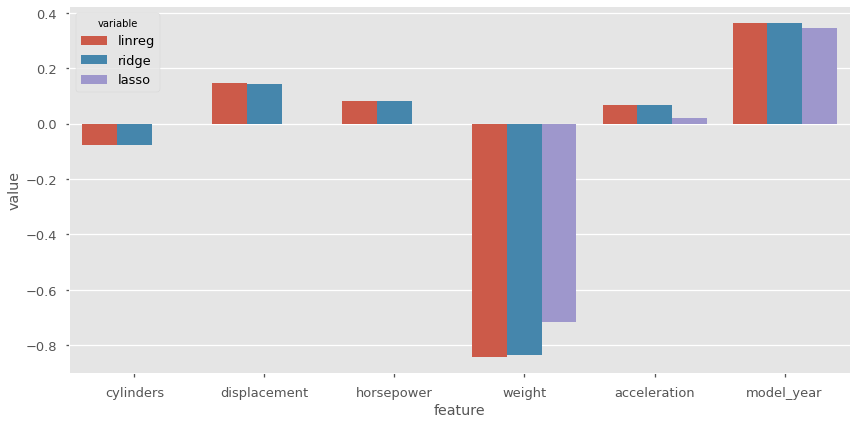

In [18]:
# Show the difference between coefficients.
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='feature', y='value', hue='variable', data=melted_coef)
fig.tight_layout()

<a id='generating_data'></a>
# Bonus: Generating Data

While there are some common "toy" datasets we can always use to test out models, we can also generate datasets from `sklearn.datasets`!

*Documentation:*
- Samples Generators (*`sklearn.datasets.make_{something}()`*)
    - https://scikit-learn.org/stable/modules/classes.html#samples-generator

In [19]:
from sklearn.datasets import make_regression

Datatype of X:	<class 'numpy.ndarray'>
Datatype of y:	<class 'numpy.ndarray'>


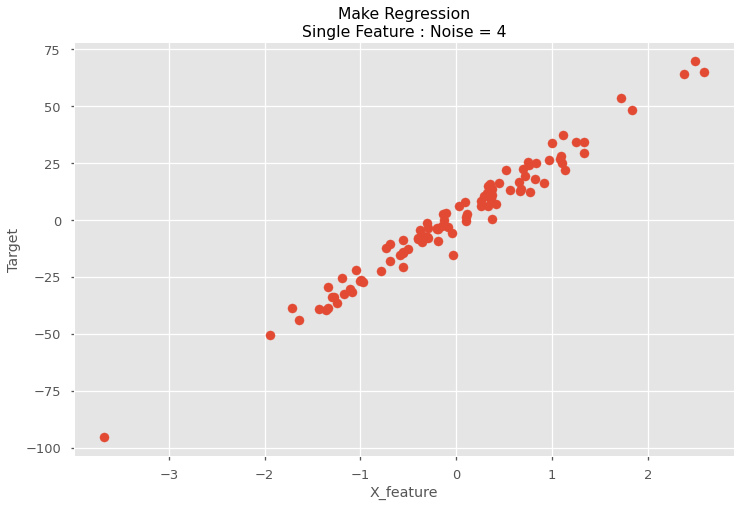

In [20]:
# Let's try it out!
X, y = make_regression(
    n_features=1, # One feature to see it on a plane.
    noise=4, # Adding some noise to the data.,
    random_state=51
    )

# Explore output.
print(f'Datatype of X:\t{type(X)}\nDatatype of y:\t{type(y)}')

# Plot.
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.set(
    title='Make Regression\nSingle Feature : Noise = 4',
    xlabel='X_feature',
    ylabel='Target'
    )
fig.tight_layout()

In [21]:
# Create a dataset with:
## 1000 samples, 
## 30 features (10 of which are informative), 
## some noise, 
## some random state.
